# Selection of Prototypes Based on Their Predicted Correlation

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

In [2]:
results = pd.read_csv(
    "../../results/classification_1nn_fdtw_regress_fdtw.csv", index_col=0
)

In [3]:
results.columns

Index(['n_features', 'n_max', '1NN_fastdtw', 'features_fastdtw',
       'random50_fastdtw', 'fdtw_mean0_fastdtw', 'n_mean0_used',
       'fdtw_mean1_fastdtw', 'n_mean1_used', 'fdtw_max0_fastdtw',
       'n_max0_used'],
      dtype='object')

In [4]:
acc_columns = [
    "1NN_fastdtw",
    "features_fastdtw",
    "random50_fastdtw",
    "fdtw_mean0_fastdtw",
    "fdtw_mean1_fastdtw",
    "fdtw_max0_fastdtw",
]

In [5]:
results[["features_fastdtw", "fdtw_mean0_fastdtw", "random50_fastdtw"]].head(20)

,features_fastdtw,fdtw_mean0_fastdtw,random50_fastdtw
dataset,,,
BirdChicken,0.650,0.750,0.680
BeetleFly,0.750,0.700,0.670
Coffee,1.000,1.000,0.950
Beef,0.400,0.533,0.520
OliveOil,0.833,0.822,0.873
Rock,0.440,0.360,0.412
PickupGestureWiimoteZ,0.740,0.727,0.724
ShakeGestureWiimoteZ,0.960,0.820,0.936
Wine,0.722,0.667,0.726


In [6]:
results[acc_columns].rank(axis=1)

,1NN_fastdtw,features_fastdtw,random50_fastdtw,fdtw_mean0_fastdtw,fdtw_mean1_fastdtw,fdtw_max0_fastdtw
dataset,,,,,,
BirdChicken,5.5,1.0,2.0,5.5,3.5,3.5
BeetleFly,3.5,5.5,2.0,3.5,1.0,5.5
Coffee,2.0,5.5,1.0,5.5,3.5,3.5
Beef,6.0,1.0,4.0,5.0,2.0,3.0
OliveOil,3.0,3.0,5.0,1.0,3.0,6.0
...,...,...,...,...,...,...
UWaveGestureLibraryZ,5.0,6.0,1.0,4.0,3.0,2.0
UWaveGestureLibraryAll,5.0,6.0,1.0,4.0,2.0,3.0
ECG5000,5.5,1.0,5.5,3.0,2.0,4.0


<AxesSubplot:>

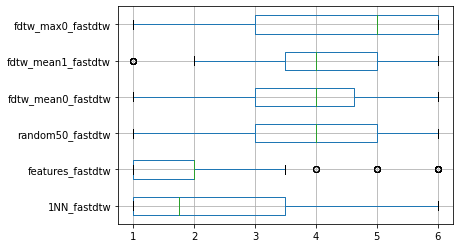

In [7]:
results[acc_columns].rank(ascending=False, axis=1).boxplot(vert=False)

In [8]:
res_frame = (
    results[acc_columns]
    .rank(ascending=False, axis=1)
    .mean(axis=0)
    .sort_values()
    .reset_index()
)

In [9]:
res_frame.columns = ["Prototype Selection", "Average Rank"]

In [10]:
res_frame

,Prototype Selection,Average Rank
0,features_fastdtw,2.237500
1,1NN_fastdtw,2.354167
2,fdtw_mean0_fastdtw,3.775000
3,random50_fastdtw,3.908333
4,fdtw_mean1_fastdtw,4.287500
5,fdtw_max0_fastdtw,4.437500


In [11]:
results[acc_columns].mean(axis=0).sort_values()

fdtw_max0_fastdtw     0.663717
fdtw_mean1_fastdtw    0.667442
fdtw_mean0_fastdtw    0.677767
random50_fastdtw      0.680558
features_fastdtw      0.714692
1NN_fastdtw           0.737483
dtype: float64

In [12]:
results[["fdtw_mean0_fastdtw", "random50_fastdtw"]].diff(axis=1).mean()

fdtw_mean0_fastdtw         NaN
random50_fastdtw      0.002792
dtype: float64